# Objective:

## Here we take a very basic first look at the data. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import functions as f

In [2]:
df = pd.read_csv("star_classification.csv")

## 18 features

In [5]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [37]:
len(df.columns)

18

## The different classes that we have

In [7]:
df['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

## Encoding the target feature, it begins as a categorical object type feature and I turn it into a categorical numerical feature using label encoding 

In [9]:
## Encoding class feature
from sklearn.preprocessing import LabelEncoder

lE = LabelEncoder()

lE.fit(df['class'])

df['target'] = lE.transform(df['class'])

## Number to Category match 
print("Mapping:", dict(zip(lE.classes_, lE.transform(lE.classes_))))

## Drop categorical Class
df = df.drop(columns='class')

Mapping: {'GALAXY': 0, 'QSO': 1, 'STAR': 2}


## The making of class specific dataframes

In [ ]:
## Dataframe for each class
df_star = df[df['target'] == 2]
df_glxy = df[df['target'] == 0]
df_qso = df[df['target'] == 1]

## Histogram

### Here we see various histograms plotted by class, remember Galaxy is represented by 0, Quasar by 1, and Star by 2. "cam_col" is a feature that at first glance is numerical but here we see more categorical properties from it. We also see strange graphs from "u", "g", "z", and "rerun_ID".

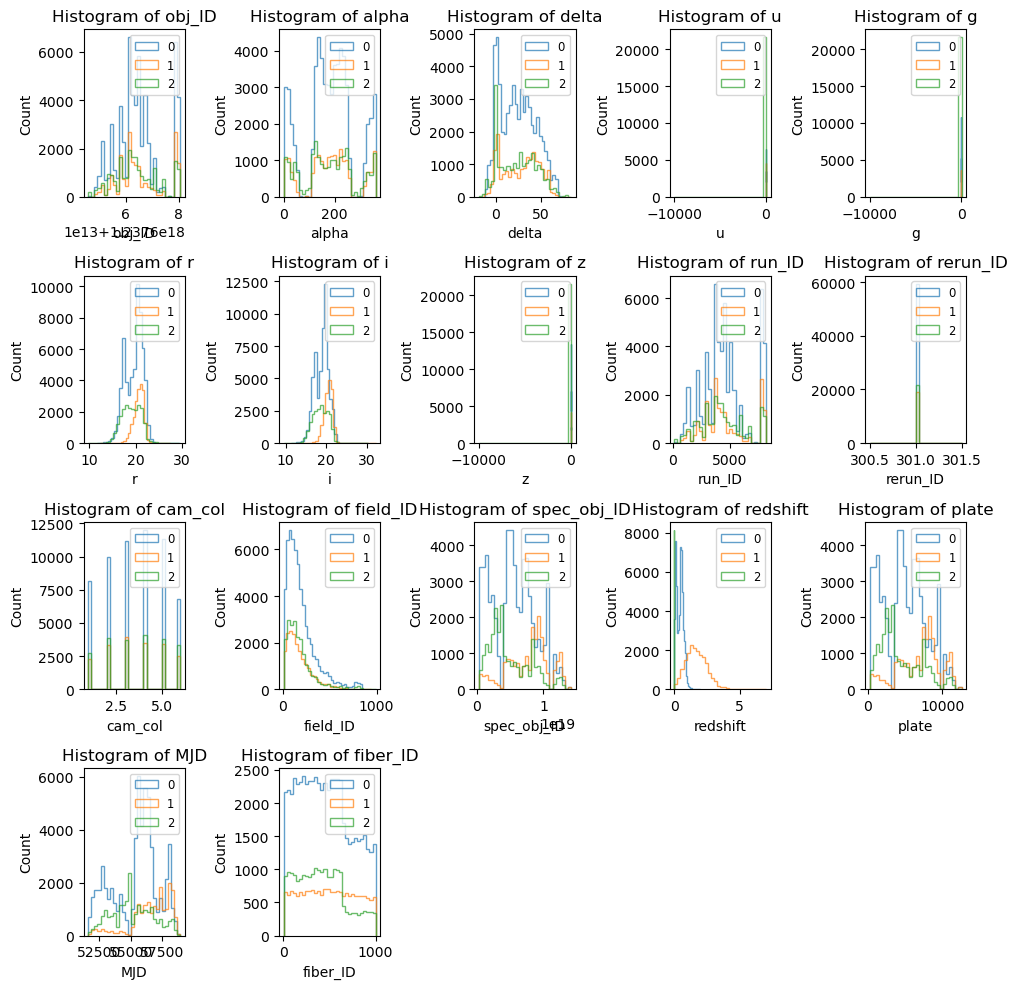

In [19]:
## Histogram 
fig, axs = f.plot_histograms_by_class(
    df,
    target_col='target'
)

## Heatmap

## There are a some features that immediately jump at you here. "rerun_ID" has no correlation at all. There are a few pairs of features that are highly correlated, "obj_ID" & "run_ID", "plate" & "spec_obj_ID", and even a group, "z", "u", & "g". 

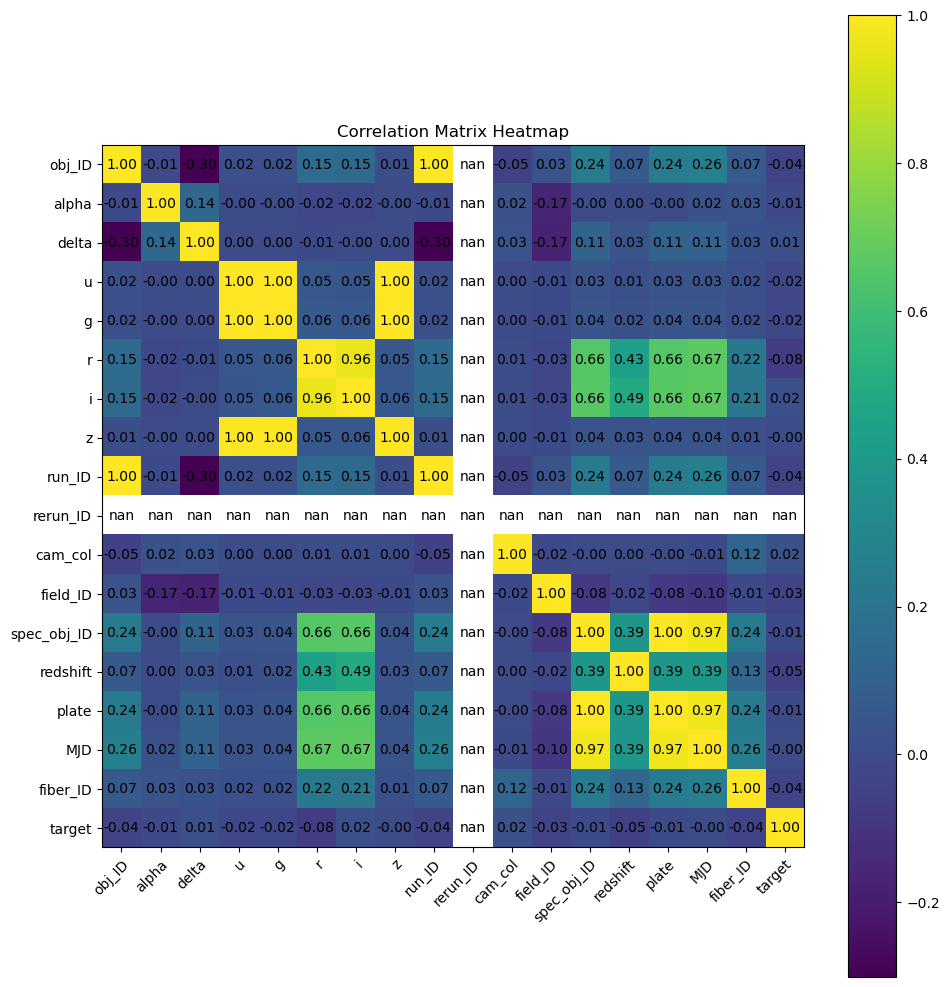

In [23]:
## Heatmap
fig, ax = f.plot_correlation_heatmap(df, figsize=(10,10))

## Boxplot

### There seems to be outliers so huge they make the graphs for "u", "g", and "z", difficult to read. 

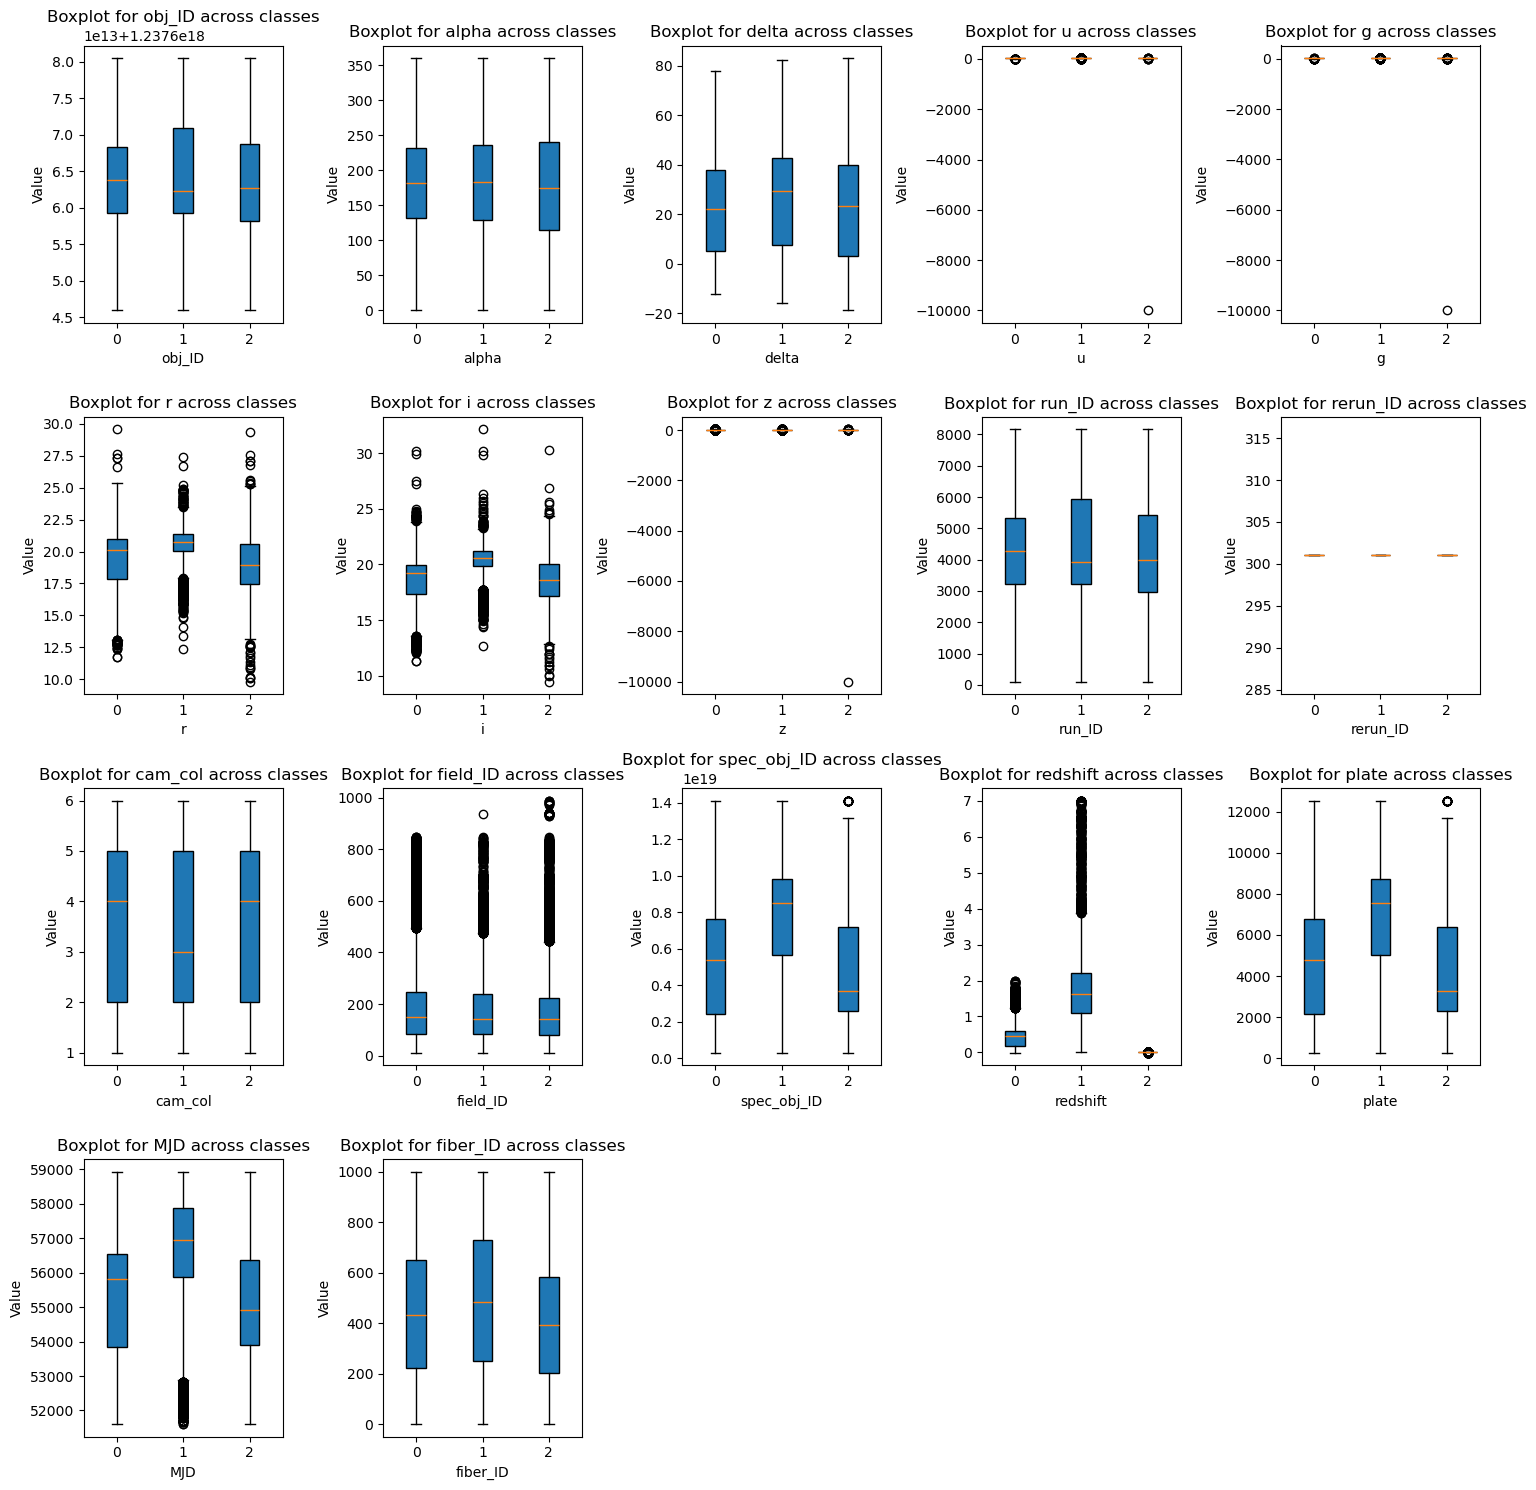

In [27]:
## Boxplot
fig, axs = f.plot_boxplots_by_class(df, target_col='target')